In [1]:
from numpy import *
import matplotlib.pyplot as plt




In [3]:
# Range of time (unit: year)
t = arange(0, 650, 1)
# Range of age (unit: year)
age = arange(1, 1001)
# Concentration of CO2
X_at = [1715 * exp(0.0305 * ti) / (1715 + exp(0.0305 * ti) - 1) + 284 for ti in t]
# Global annual mean temperature
sigma = 4.5
Ts = [15 + (sigma / log(2)) * log(Xa / 285)
      for Xa in X_at]

############# Input #############
x = 0.65
Gamma_Ts = [42.7 + 1.68 * (T - 25) + 0.012 * (T - 25) ** 2 for T in Ts]
Beta_X_Ts = [(3 * x * Xa * Gamma) / ((x * Xa - Gamma) * (x * Xa + 2 * Gamma)) for Xa, Gamma in zip(X_at, Gamma_Ts)]
s0 = 300 # Input at initial time
# Input
S1 = [s0 * (1 + 2.14 * Beta * log(Xa / 285)) for Beta, Xa in zip(Beta_X_Ts, X_at)]
# Temperature scale
Var = [2 ** (0.1 * new - 1.5) for new in Ts]


###############################
## rMM ##
###############################

k = 0.1
K_b = 100

cue = linspace(0.2, 0.6, 50)
u_b = linspace(0.3, 0.8, 50)
v_s_rMM = linspace(0.02, 0.06, 50)
B, S = meshgrid(u_b, v_s_rMM)
U_B = ravel(B)
V_S_rMM = ravel(S)

arr_A = array([[]] * (len(cue) + 2))
for ub, us in zip(U_B, V_S_rMM):
    C_A_1 = array(
        [(k + 1 / (EPI ** (-1) - 1)) * S1[0] / us + (1 + k * (EPI ** (-1) - 1)) * ub * K_b / us for EPI in cue])
    C_A_tem = insert(C_A_1, 0, [ub, us])
    arr_A = column_stack((arr_A, C_A_tem))
arr_A = arr_A.T
save('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S8 (a)', arr_A)

###################################### model B

K_l = 67275
k = 0.1
K_s = 363871
v_s = linspace(10, 50, 50)
UB, VS = meshgrid(u_b, v_s)
U_B = ravel(UB)
V_S = ravel(VS)

arr_B = array([[]] * (len(v_s) + 2))

for ub, vs in zip(U_B, V_S):
    C_B_1 = array([K_s / (vs / ub * EPI / (EPI + k * (1 - EPI)) - 1) for EPI in cue])
    C_B_tem = insert(C_B_1, 0, [ub, vs])
    arr_B = column_stack((arr_B, C_B_tem))
arr_B = arr_B.T
save('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S8 (b)', arr_B)


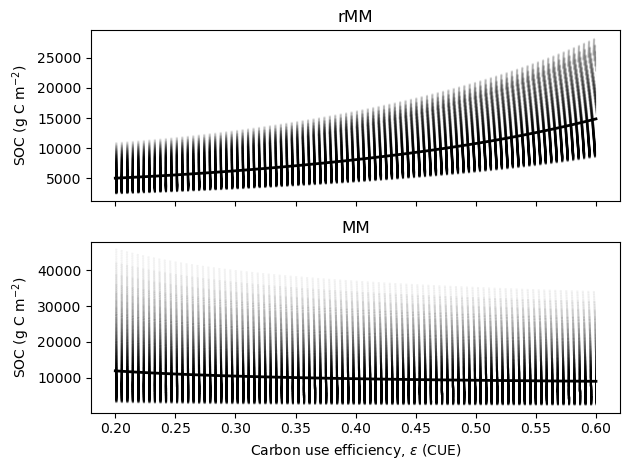

In [6]:
###################################################
###################################################
# plot
###################################################
###################################################

arr_A = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S8 (a).npy')
arr_A_mean = average(arr_A, axis=0)

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.set_title('rMM')
ax1.set_ylabel('SOC (g C $\mathregular{m^{-2}}$)')
for i in range(len(arr_A)):
    ax1.plot(cue, arr_A[i, 2:], color='k', alpha=0.05, linestyle=':')
ax1.plot(cue, arr_A_mean[2:], color='k', linewidth=2)
ax1.tick_params('x', labelbottom=False)

arr_B = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S8 (b).npy')
arr_B_mean = average(arr_B, axis=0)
ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)
ax2.set_title('MM')
ax2.set_xlabel('Carbon use efficiency, $\epsilon$ (CUE)')
ax2.set_ylabel('SOC (g C $\mathregular{m^{-2}}$)')
for i in range(len(arr_B)):
    ax2.plot(cue, arr_B[i, 2:], color='k', alpha=0.05, linestyle=':')
ax2.plot(cue, arr_B_mean[2:], color='k', linewidth=2)
fig.tight_layout()
plt.savefig('Figure. S8.png', dpi=600)
